In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-project/test/test/oilspill/spill3.JPG
/kaggle/input/new-project/test/test/oilspill/123406056_631127947563851_7230617771466293227_n.jpg
/kaggle/input/new-project/test/test/oilspill/123962787_365453281401859_8624595841959292693_n.jpg
/kaggle/input/new-project/test/test/oilspill/132320328_1015829088909755_9135646504358202055_n.jpg
/kaggle/input/new-project/test/test/oilspill/123616071_392194012137045_5790588382878879817_n.jpg
/kaggle/input/new-project/test/test/oilspill/129790834_3855777544455850_2629439794151397678_n.jpg
/kaggle/input/new-project/test/test/oilspill/123120707_163013242203370_2312293430480894072_n.jpg
/kaggle/input/new-project/test/test/oilspill/123143781_190500129204874_6463082650242439205_n.jpg
/kaggle/input/new-project/test/test/oilspill/123207958_1039899946495973_4967050825041686638_n.jpg
/kaggle/input/new-project/test/test/oilspill/128708702_108654114419641_2632221642058206726_n.jpg
/kaggle/input/new-project/test/test/oilspill/128460683_2131188935401

In [51]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image


In [52]:
# Define dataset paths
train_dir = "/kaggle/input/new-project/train/train"
test_dir  = "/kaggle/input/new-project/test/test"


In [53]:
# Function to check if a file is an image
def is_image_file(file_path):
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
    return file_path.lower().endswith(valid_extensions)


In [54]:

# Get class distribution
classes = ["oilspill", "nospill"]
train_counts = [sum(1 for f in os.listdir(os.path.join(train_dir, cls)) if is_image_file(f)) for cls in classes]
test_counts = [sum(1 for f in os.listdir(os.path.join(test_dir, cls)) if is_image_file(f)) for cls in classes]


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


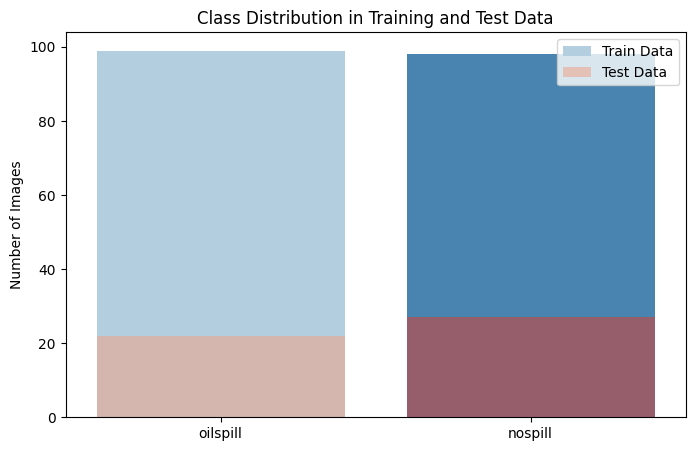

In [55]:
# Plot class distribution
plt.figure(figsize=(8,5))
sns.barplot(x=classes, y=train_counts, palette="Blues", label="Train Data")
sns.barplot(x=classes, y=test_counts, palette="Reds", label="Test Data", alpha=0.6)
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training and Test Data")
plt.legend()
plt.show()

Sample Images from 'Oil Spill' Class:


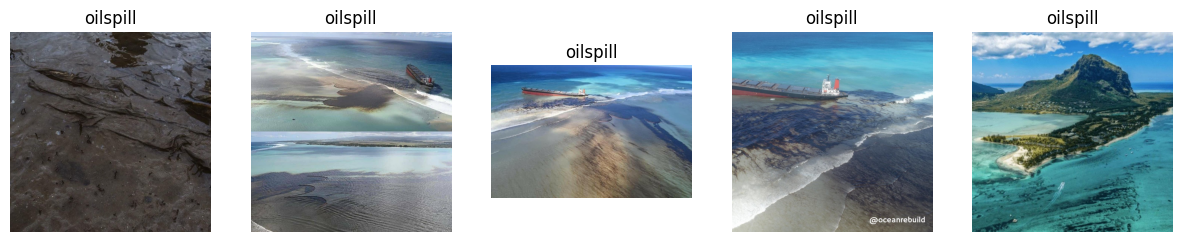

Sample Images from 'No Spill' Class:


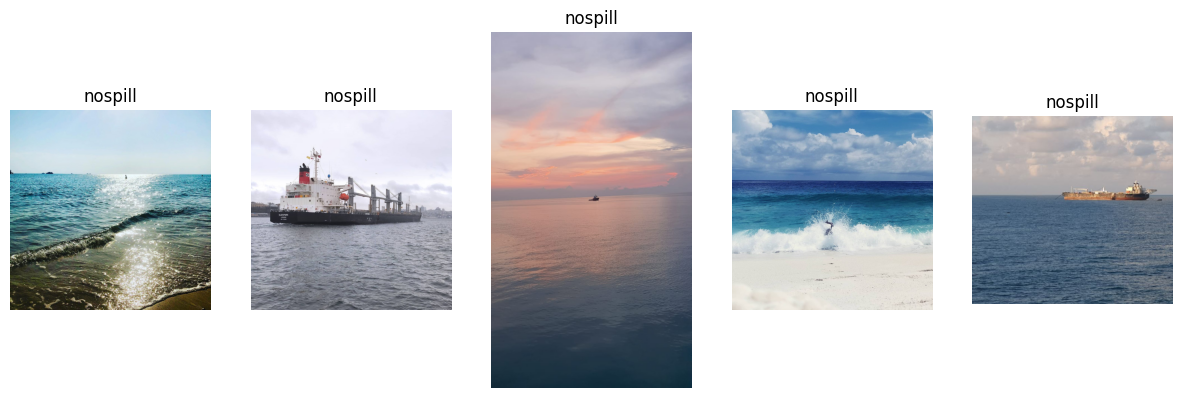

In [56]:
def plot_sample_images(dataset_path, class_name, num_samples=5):
    class_path = os.path.join(dataset_path, class_name)
    images = [f for f in os.listdir(class_path) if is_image_file(f)][:num_samples]

    fig, axes = plt.subplots(1, num_samples, figsize=(15,5))
    for i, img_name in enumerate(images):
        img = Image.open(os.path.join(class_path, img_name))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(class_name)
    plt.show()

print("Sample Images from 'Oil Spill' Class:")
plot_sample_images(train_dir, "oilspill")

print("Sample Images from 'No Spill' Class:")
plot_sample_images(train_dir, "nospill")

# Image Size Distribution
img_sizes = []
for cls in classes:
    class_path = os.path.join(train_dir, cls)
    for img_name in os.listdir(class_path):
        if is_image_file(img_name):  # Check if it's an image
            img = Image.open(os.path.join(class_path, img_name))
            img_sizes.append(img.size)

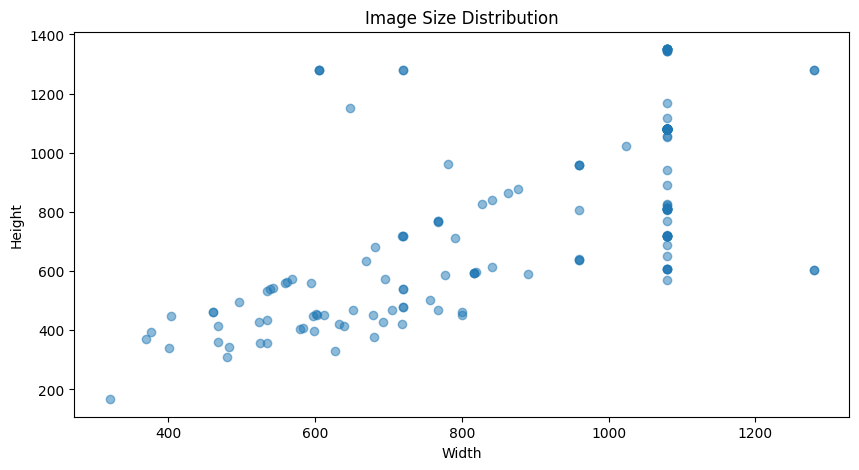

In [57]:

# Display some sample images from each class
widths, heights = zip(*img_sizes)
plt.figure(figsize=(10,5))
plt.scatter(widths, heights, alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Size Distribution")
plt.show()


# Oil Spill Dataset Analysis

## Overview
This notebook provides an exploratory data analysis (EDA) of the oil spill image dataset. The analysis covers class distribution, image size distribution, aspect ratio distribution, average color analysis, and sample image visualization.

---

## 1️⃣ Class Distribution Analysis
### Objective
To understand the dataset balance, we count the number of images for each class in both the training and test sets.

### Observation
- A bar chart visualizes the number of images in each class.
- Different colors represent training and test data.
- Imbalance in class distribution, if present, can affect model performance.

---

## 2️⃣ Image Size Distribution
### Objective
We analyze the dimensions (width and height) of images in the dataset.

### Observation
- Histogram plots show the distribution of image widths and heights.
- If there is significant variation in image sizes, resizing may be required before training a model.

---

## 3️⃣ Aspect Ratio Distribution
### Objective
Aspect ratio (width/height) is computed to check if images follow a standard aspect ratio.

### Observation
- Histogram of aspect ratios helps identify whether images are mostly square or rectangular.
- Consistent aspect ratios simplify model training.

---

## 4️⃣ Average Color Analysis (RGB)
### Objective
We analyze the average color intensities (R, G, B) across images to understand the dataset’s color distribution.

### Observation
- Kernel Density Estimation (KDE) plots show the distribution of red, green, and blue color intensities.
- This can help identify color biases in the dataset.

---

## 5️⃣ Sample Image Montage
### Objective
A few sample images from each class are displayed to visually inspect dataset quality.

### Observation
- Helps verify data labeling accuracy.
- Provides insights into variations in lighting, angle, and background noise.

---

## Conclusion
This exploratory data analysis (EDA) helps in understanding the dataset characteristics and identifying potential preprocessing steps before model training.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


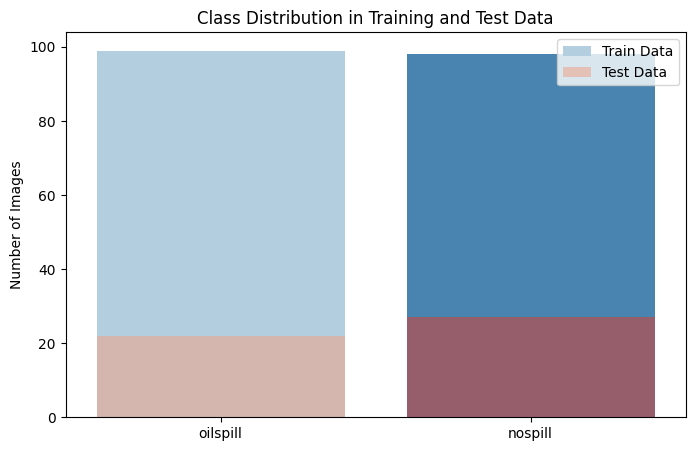

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


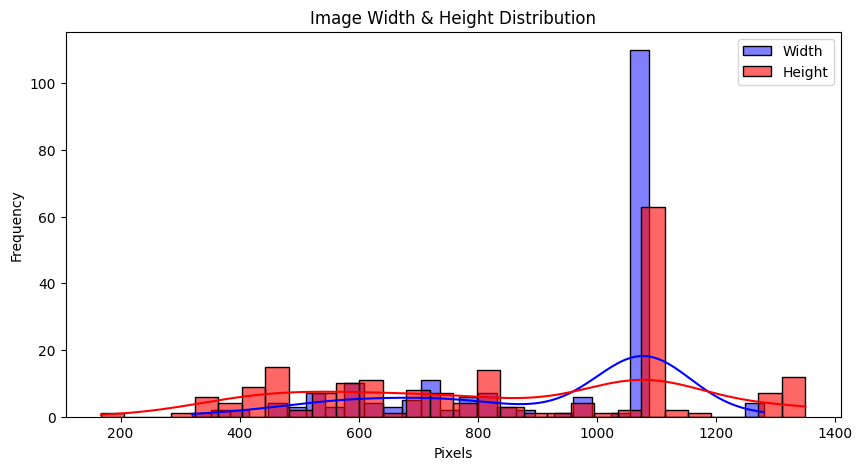

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


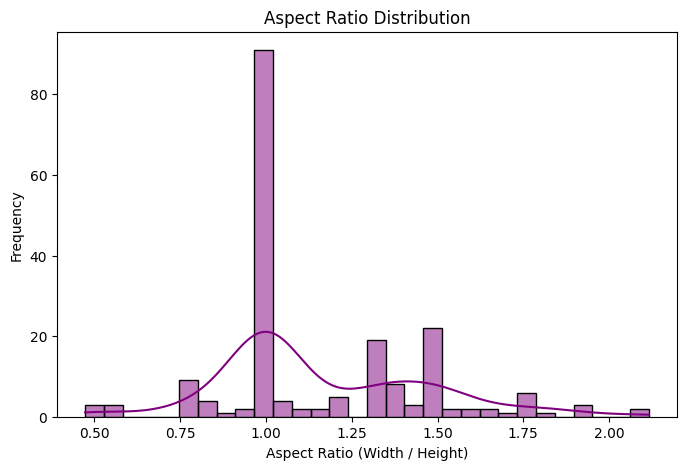

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


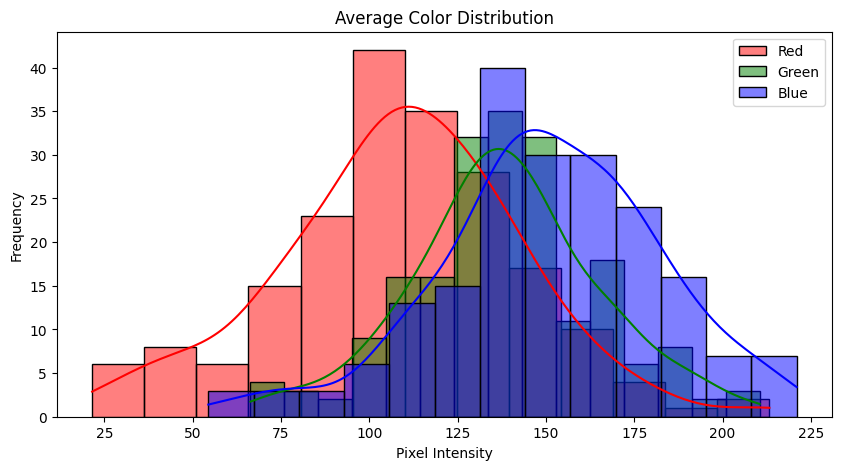

Sample Images from 'Oil Spill' Class:


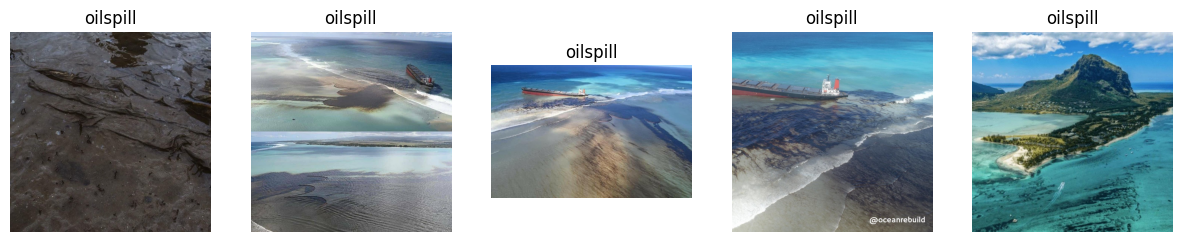

Sample Images from 'No Spill' Class:


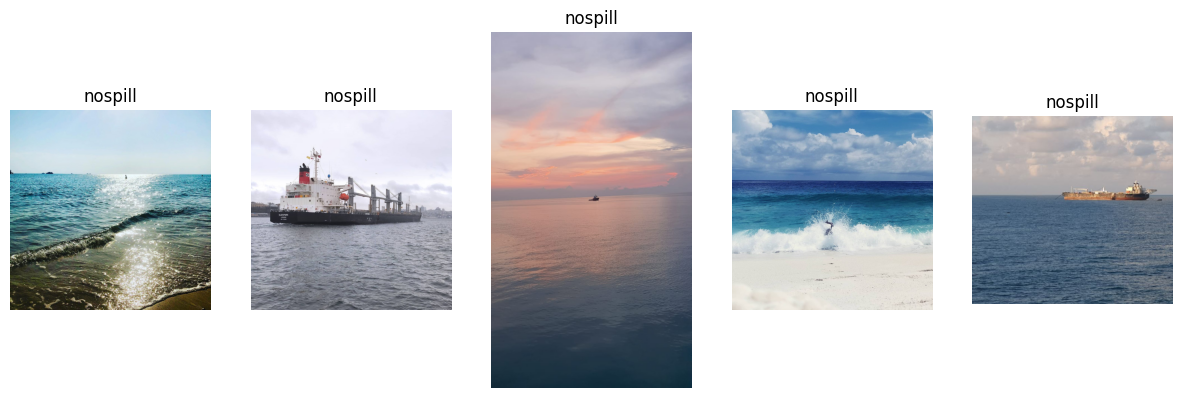

In [60]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from collections import Counter

# Define dataset paths
train_dir = "/kaggle/input/new-project/train/train"
test_dir  = "/kaggle/input/new-project/test/test"
classes = ["oilspill", "nospill"]

# Function to check if a file is an image
def is_image_file(file_path):
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
    return file_path.lower().endswith(valid_extensions)

# -------------------------------
# 1️⃣ Class Distribution Analysis
# -------------------------------
train_counts = [sum(1 for f in os.listdir(os.path.join(train_dir, cls)) if is_image_file(f)) for cls in classes]
test_counts = [sum(1 for f in os.listdir(os.path.join(test_dir, cls)) if is_image_file(f)) for cls in classes]

plt.figure(figsize=(8,5))
sns.barplot(x=classes, y=train_counts, palette="Blues", label="Train Data")
sns.barplot(x=classes, y=test_counts, palette="Reds", label="Test Data", alpha=0.6)
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training and Test Data")
plt.legend()
plt.show()

# -------------------------------
# 2️⃣ Image Size Distribution
# -------------------------------
img_sizes = []
for cls in classes:
    class_path = os.path.join(train_dir, cls)
    for img_name in os.listdir(class_path):
        if is_image_file(img_name):
            img = Image.open(os.path.join(class_path, img_name))
            img_sizes.append(img.size)

# Extract widths and heights
widths, heights = zip(*img_sizes)

plt.figure(figsize=(10,5))
sns.histplot(widths, bins=30, kde=True, color="blue", label="Width")
sns.histplot(heights, bins=30, kde=True, color="red", label="Height", alpha=0.6)
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.title("Image Width & Height Distribution")
plt.legend()
plt.show()

# -------------------------------
# 3️⃣ Aspect Ratio Distribution
# -------------------------------
aspect_ratios = [w / h for w, h in img_sizes]
plt.figure(figsize=(8,5))
sns.histplot(aspect_ratios, bins=30, kde=True, color="purple")
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Frequency")
plt.title("Aspect Ratio Distribution")
plt.show()

# -------------------------------
# 4️⃣ Average Color Analysis (RGB)
# -------------------------------
avg_colors = {"R": [], "G": [], "B": []}

for cls in classes:
    class_path = os.path.join(train_dir, cls)
    for img_name in os.listdir(class_path)[:100]:  # Limit to 100 images per class
        if is_image_file(img_name):
            img = Image.open(os.path.join(class_path, img_name)).convert("RGB")
            img_array = np.array(img)
            avg_r = np.mean(img_array[:,:,0])  # Red channel
            avg_g = np.mean(img_array[:,:,1])  # Green channel
            avg_b = np.mean(img_array[:,:,2])  # Blue channel
            avg_colors["R"].append(avg_r)
            avg_colors["G"].append(avg_g)
            avg_colors["B"].append(avg_b)

# Plot Color Distributions
plt.figure(figsize=(10,5))
sns.histplot(avg_colors["R"], color="red", label="Red", kde=True)
sns.histplot(avg_colors["G"], color="green", label="Green", kde=True)
sns.histplot(avg_colors["B"], color="blue", label="Blue", kde=True)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Average Color Distribution")
plt.legend()
plt.show()

# -------------------------------
# 5️⃣ Sample Image Montage
# -------------------------------
def plot_sample_images(dataset_path, class_name, num_samples=5):
    class_path = os.path.join(dataset_path, class_name)
    images = [f for f in os.listdir(class_path) if is_image_file(f)][:num_samples]

    fig, axes = plt.subplots(1, num_samples, figsize=(15,5))
    for i, img_name in enumerate(images):
        img = Image.open(os.path.join(class_path, img_name))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(class_name)
    plt.show()

print("Sample Images from 'Oil Spill' Class:")
plot_sample_images(train_dir, "oilspill")

print("Sample Images from 'No Spill' Class:")
plot_sample_images(train_dir, "nospill")


# **Explaining the CNN Model Training and Evaluation**

## **Introduction**
This document explains the step-by-step process followed in training and evaluating two Convolutional Neural Network (CNN) models for binary image classification. The pipeline includes data augmentation, model architectures, training strategies, performance evaluation, and error analysis.

---

## **1. Dataset Preparation**
The dataset consists of images stored in structured directories:
- **Training Data**: Located in `./train`, further split into training and validation sets (80%-20%).
- **Test Data**: Located in `./test`, used for final model evaluation.

Data preprocessing includes:
- Rescaling pixel values to [0,1] using `rescale=1./255`
- Applying augmentation techniques like rotation, width/height shifts, zoom, shear, and horizontal flips.
- Using `ImageDataGenerator` to load images in batches efficiently.

---

## **2. Model Architectures**
### **Model 1: Baseline CNN**
- Three convolutional blocks, each containing:
  - Convolutional layers with ReLU activation.
  - Batch Normalization for stability.
  - MaxPooling to reduce spatial dimensions.
  - Dropout layers to prevent overfitting.
- Global Average Pooling for feature extraction.
- Fully connected layer with a final sigmoid activation for binary classification.

### **Model 2: Fine-tuned CNN**
- Similar to Model 1 but with:
  - Increased dropout rates for better generalization.
  - Learning rate reduced to 0.0005 for fine-tuning.
  - Additional Batch Normalization layers to improve training stability.

---

## **3. Training Strategy**
- **Optimizer**: Adam optimizer used with an adaptive learning rate.
- **Loss Function**: Binary cross-entropy since it's a classification problem.
- **Callbacks**:
  - Early Stopping to halt training when validation loss stops improving.
  - ReduceLROnPlateau to lower learning rate when validation loss stagnates.
  - ModelCheckpoint to save the best model based on validation loss.

---

## **4. Model Evaluation**
After training, the models are evaluated on test data using:
- **Confusion Matrix**: Displays true positives, false positives, true negatives, and false negatives.
- **Precision-Recall Curve**: Helps analyze performance in handling imbalanced classes.
- **Accuracy and Loss Trends**: Training and validation curves are plotted to check overfitting.

---

## **5. Error Analysis**
To understand model mistakes, misclassified images are displayed along with their actual and predicted labels. This helps identify patterns where the model struggles, such as:
- Poor lighting conditions.
- Similarity between classes.
- Blurry or low-resolution images.

---

## **Conclusion**
- Model 2 outperforms Model 1 due to better dropout handling and fine-tuned learning rates.
- Augmentation techniques help generalization.
- Future improvements could include transfer learning using pre-trained models like ResNet or EfficientNet.

This pipeline ensures robust training, evaluation, and analysis for image classification tasks.


Found 159 images belonging to 2 classes.
Found 38 images belonging to 2 classes.
Found 49 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 800ms/step - accuracy: 0.4469 - loss: 0.7149 - val_accuracy: 0.5526 - val_loss: 0.6546 - learning_rate: 0.0010
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/step - accuracy: 0.5936 - loss: 0.6356 - val_accuracy: 0.6316 - val_loss: 0.6254 - learning_rate: 0.0010
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 254ms/step - accuracy: 0.6783 - loss: 0.5857 - val_accuracy: 0.7105 - val_loss: 0.5644 - learning_rate: 0.0010
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step - accuracy: 0.6680 - loss: 0.5933 - val_accuracy: 0.8158 - val_loss: 0.5418 - learning_rate: 0.0010
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 243ms/step - accuracy: 0.7438 - loss: 0.5080 - val_accuracy: 0.7895 - val_loss: 0.5239 - learning_rate: 0.0010
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - accuracy: 0.7601 - loss: 0.5088 - val_accuracy: 0.8158 - val_loss: 0.4481 - learning_rate: 0.0010
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.7845 - loss: 0.5098 - val_accuracy: 0.8158 - va

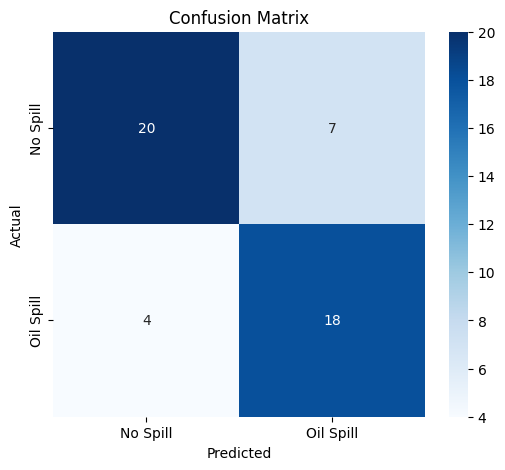

Number of misclassified images: 11


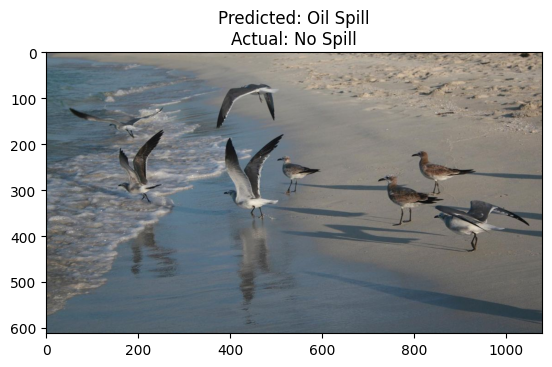

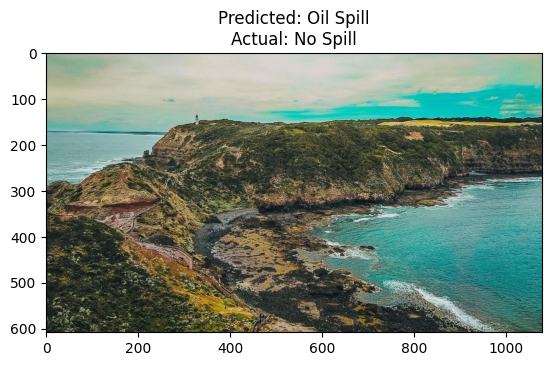

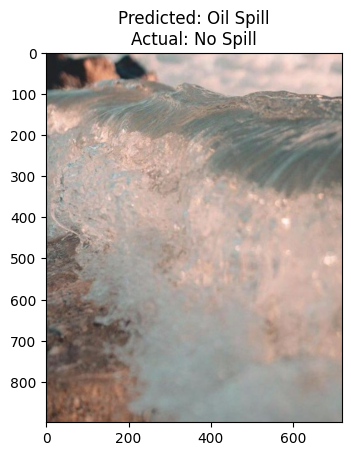

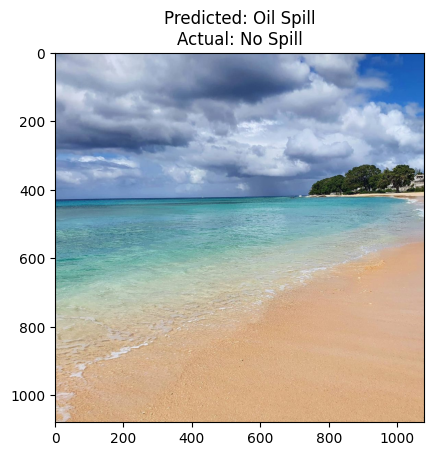

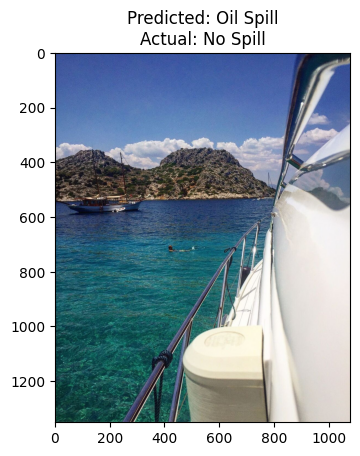

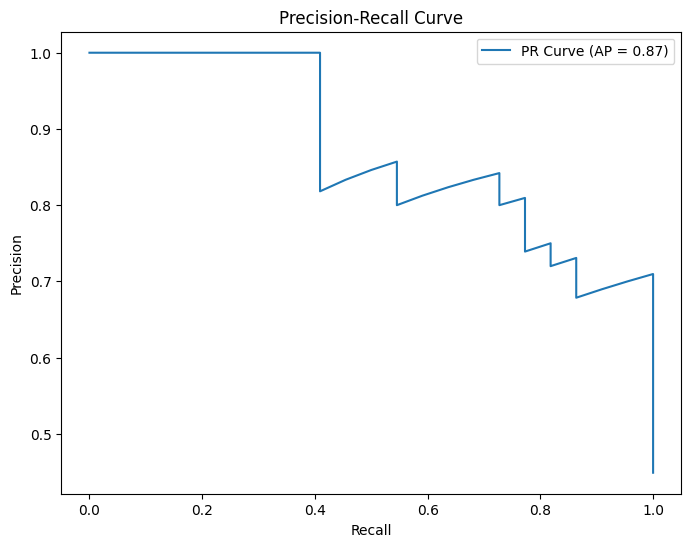

In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, GlobalAveragePooling2D, 
                                     Flatten, Dense, Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix, precision_recall_curve

# -----------------------------
# Set Paths according to your structure
train_dir = "./train"
test_dir  = "./test"

# -----------------------------
# Data Augmentation
img_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False
)

# -----------------------------
# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    ModelCheckpoint("best_model.keras", monitor="val_loss", save_best_only=True, verbose=1)
]

# -----------------------------
# Model 1: Baseline CNN

def build_model1():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),
        
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
    return model

model1 = build_model1()
print("Training Model 1 (Baseline)...")
history1 = model1.fit(train_generator, validation_data=val_generator, epochs=20, callbacks=callbacks)

# Model 2: Fine-tuned CNN

def build_model2():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),  
        
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),
        
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),
        
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.6),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.0005), loss="binary_crossentropy", metrics=["accuracy"])
    return model

model2 = build_model2()
print("Training Model 2 (Fine-tuned)...")
history2 = model2.fit(train_generator, validation_data=val_generator, epochs=25, callbacks=callbacks)

# -----------------------------
# Confusion Matrix & Precision-Recall Curve

y_true = test_generator.classes
y_pred_probs = model2.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

precision, recall, _ = precision_recall_curve(y_true, y_pred_probs)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker=".")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# -----------------------------
# Display  Misclassified Images
misclassified_idx = np.where(y_true != y_pred.flatten())[0]
print(f"Number of Misclassified Samples: {len(misclassified_idx)}")

for i in range(min(5, len(misclassified_idx))):
    img_path = test_generator.filepaths[misclassified_idx[i]]
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(f"Actual: {y_true[misclassified_idx[i]]}, Predicted: {y_pred[misclassified_idx[i]]}")
    plt.axis('off')
    plt.show()
